# Response function plugin for Pastas

This notebook shows usage of a custom response function from the responses plugin for
Pastas.

In [11]:
import numpy as np
import pandas as pd
import pastas as ps

import pastas_plugins as pp
from pastas_plugins import responses

In [12]:
pp.show_plugin_versions()

pastas_plugins version : 0.1.0.dev0
- modflow version      : 0.1.0
- reservoirs version   : 0.2.0
- responses version    : 0.3.0



## The Theis response function

The Theis response function is based on the analytical solution for pumping between two
infinitely long ditches.

In [17]:
rng = np.random.default_rng()

tidx = pd.date_range("2014-01-01", "2024-01-01", freq="D")
oseries = pd.Series(index=tidx, data=1.0)
stress = pd.Series(index=tidx, data=rng.random(len(tidx)))


ml = ps.Model(oseries)
sm = ps.StressModel(
    stress, rfunc=responses.Theis(), name="theis", up=False, settings="well"
)
ml.add_stressmodel(sm)
ml.solve()

Fit report None                     Fit Statistics
nfev    73                     EVP          100.00
nobs    3653                   R2             -inf
noise   False                  RMSE           0.00
tmin    2014-01-01 00:00:00    AICc     -179898.19
tmax    2024-01-01 00:00:00    BIC      -179873.39
freq    D                      Obj            0.00
warmup  3650 days 00:00:00     ___                
solver  LeastSquares           Interp.          No

Parameters (4 optimized)
              optimal   initial  vary
theis_A     -0.000031   -3.4176  True
theis_a     41.725925  100.0000  True
theis_b      0.499998    0.0010  True
constant_d   1.000000    1.0000  True

Warnings! (1)
Parameter 'theis_b' on upper bound: 5.00e-01


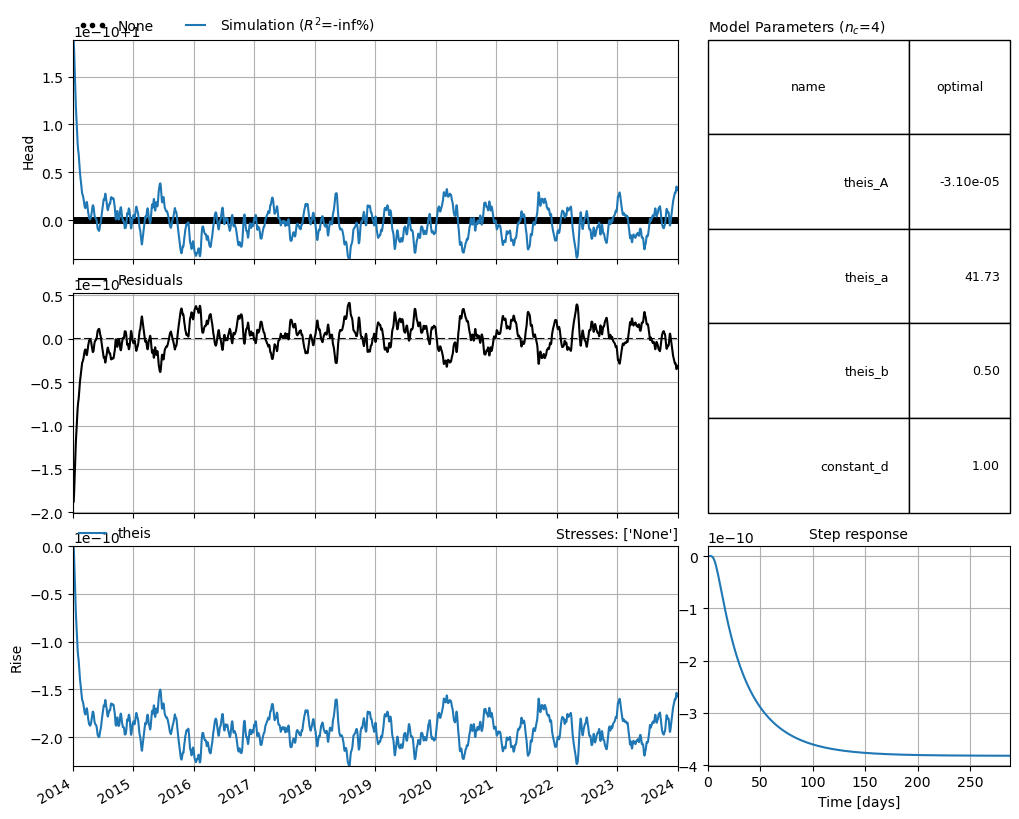

In [19]:
axes = ml.plots.results()